# Introduction

This Jupyter Notebook is designed as a comprehensive guide to the application of various machine learning and deep learning techniques for a classification problem. The primary focus is on the prediction of customer churn in a telecommunications company, a common and critical issue in the industry. By accurately predicting churn, companies can devise strategies to retain customers, thereby improving business sustainability and profitability.

## Dataset Overview

The dataset used in this analysis is the "Telco Customer Churn" dataset, which contains information about a telecom company's customers and their churn status. Key features include customer demographics, account information, and the services they have subscribed to. The target variable is 'Churn', indicating whether a customer has left the company within the last month.

## Problem Statement

The objective is to build and compare various predictive models to effectively predict customer churn. We will explore traditional machine learning models like Logistic Regression, Decision Trees, and Random Forests, alongside more complex deep learning models such as Neural Networks, Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and hybrid models. The performance of these models will be evaluated and compared to select the best approach for predicting customer churn.

The analysis will proceed through several stages, including data preprocessing, exploratory data analysis (EDA), model building, training, evaluation, and hyperparameter tuning. This structured approach ensures a thorough examination of the dataset and the application of machine learning and deep learning techniques to solve a real-world problem in the telecommunications sector.

# Setup

Before diving into the analysis, it's crucial to set up our environment by installing and importing the necessary libraries. These libraries provide a wide range of functionalities, from data manipulation and visualization to building and evaluating various machine learning and deep learning models.

## Libraries Used

- `NumPy` and `Pandas`: For efficient data manipulation and analysis.
- `Matplotlib` and `Seaborn`: For data visualization.
- `TensorFlow`: An open-source library for machine learning and deep learning applications.
- `Scikit-learn`: A tool for data mining and data analysis, particularly useful for its machine learning algorithms.
- `imblearn`: For handling imbalanced datasets using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

By importing these libraries, we ensure that all the necessary tools are available for each step of our analysis.

In [25]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, concatenate, Dropout, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

# Data Loading and Preprocessing

In this section, we will focus on loading the dataset and preparing it for analysis. Data preprocessing is a crucial step in any data analysis and machine learning project. It involves cleaning and transforming raw data into a format that is more suitable for building predictive models. Our preprocessing steps will include handling missing values, encoding categorical variables, and scaling numerical features.

## Key Steps in Data Preprocessing

1. **Loading Data**: Importing the dataset into a Pandas DataFrame.
2. **Handling Missing Values**: Identifying and imputing missing values, especially in crucial columns.
3. **Feature Encoding**: Converting categorical variables into a form that can be provided to ML algorithms.
4. **Feature Scaling**: Normalizing or standardizing numerical features so that they are on the same scale.
5. **Data Transformation**: Applying transformations to prepare the dataset for model training and testing.

## Preprocessing Function

We will define a function `load_and_preprocess_data` which will carry out these preprocessing steps. This function will take the file path of the dataset as an input and return the preprocessed features (`X`), target variable (`y`), a preprocessor object for transforming new data, and the DataFrame for EDA.

In [26]:
# Function to load and preprocess the dataset
def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)

    # Convert 'TotalCharges' to numeric and handle non-numeric entries
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

    # Defining categorical and numerical features
    categorical_features = ['gender', 'PaymentMethod', 'InternetService']
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

    # Preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)])

    X = df.drop('Churn', axis=1)
    y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    return X, y, preprocessor, df

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis, or EDA, is a critical step in the data analysis process. It allows us to understand the data, identify patterns and anomalies, and formulate hypotheses. EDA involves summarizing the main characteristics of the dataset, often with visual methods. In this section, we will perform EDA on our dataset to gain insights into the relationships between different features and the target variable, `Churn`.

## Objectives of EDA

1. **Understanding the Data**: Get an overview of the dataset, including data types, number of rows/columns, and basic statistics.
2. **Detecting Outliers and Anomalies**: Identify any unusual observations in the dataset which might be errors or require special handling.
3. **Analyzing Relationships between Variables**: Explore how different features relate to each other and to the target variable.

## EDA Function

We will define a function `perform_eda` that encapsulates various EDA steps. This function will take the DataFrame as input and perform operations like statistical summary, correlation analysis, and visualizations.

In [27]:
# Function to perform exploratory data analysis (EDA)
def perform_eda(df):
    print("Statistical Summary:")
    print(df.describe())

    # Select only numeric columns for correlation matrix
    numeric_cols = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 10))
    print("Correlation Matrix:")
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.show()

    # Add more EDA visualizations and analyses as needed

# Model Creation

After exploring and preprocessing our dataset, the next step is to build predictive models. In this section, we will define various machine learning and deep learning models to address our classification problem - predicting customer churn. We aim to explore a range of models, from simple linear classifiers to more complex neural networks, to understand which models perform best for our specific dataset.

## Types of Models to be Created

1. **Logistic Regression**: A baseline linear model for binary classification problems.
2. **Decision Tree and Random Forest**: Non-linear models that are effective for classification and regression tasks.
3. **Support Vector Machine (SVM)**: A powerful classifier that works well on a wide range of datasets.
4. **K-Nearest Neighbors (KNN)**: A simple, distance-based classifier.
5. **Gradient Boosting Classifier**: An ensemble method which combines several weak learners to form a strong learner.
6. **Neural Networks**: Deep learning models capable of capturing complex relationships in the data.
7. **Recurrent Neural Network (RNN)**: Designed to work with sequence data.
8. **Convolutional Neural Network (CNN)**: Typically used for image data but can be adapted for sequence data.
9. **Hybrid Models**: Combining different types of neural networks to leverage their individual strengths.

Each of these models has its own characteristics and suitability depending on the nature of the data and the problem at hand. We will define functions to create each of these models.

## Model Creation Functions

We will create separate functions for each model type. These functions will initialize the model with basic parameters and return the model object. This modular approach makes it easy to experiment with different models and compare their performances.

In [28]:
# Neural Network Model
def create_nn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Logistic Regression Model
def create_logistic_regression_model():
    return LogisticRegression()

# Decision Tree Classifier
def create_decision_tree_model():
    return DecisionTreeClassifier()

# Random Forest Classifier
def create_random_forest_model():
    return RandomForestClassifier()

# Support Vector Machine (SVM) Model
def create_svm_model():
    return SVC()

# K-Nearest Neighbors (KNN) Model
def create_knn_model():
    return KNeighborsClassifier()

# Gradient Boosting Classifier
def create_gradient_boosting_model():
    return GradientBoostingClassifier()

# Recurrent Neural Network (RNN) Model
def create_rnn_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convolutional Neural Network (CNN) Model
def create_cnn_model(input_shape):
    model = Sequential([
        Reshape(target_shape=input_shape + (1,), input_shape=input_shape),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Additional models (like hybrid CNN-RNN models) can be defined in a similar manner.

# Training and Evaluation

With our models defined, the next crucial step is to train and evaluate them on our dataset. This phase involves feeding the models with training data and then assessing their performance using the test data. The evaluation will help us understand the effectiveness of each model in predicting customer churn and guide us in selecting the best performing model(s) for this specific problem.

## Key Steps in Training and Evaluation

1. **Model Training**: Fit the models on the training dataset.
2. **Model Evaluation**: Use the test dataset to evaluate the models' performance, focusing on metrics like accuracy, precision, recall, and F1-score.
3. **Comparison**: Compare the performance of different models to identify the most effective ones.

## Train and Evaluate Function

We will create a function `train_and_evaluate` that encapsulates the training and evaluation process. This function will take the training and testing datasets as input, along with the preprocessed features and target variable. It will then train each model and provide a summary of their performance.

In [29]:
# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Train and evaluate Logistic Regression
    lr_model = create_logistic_regression_model()
    lr_model.fit(X_train, y_train)
    print("Logistic Regression accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))

    # Train and evaluate Decision Tree
    dt_model = create_decision_tree_model()
    dt_model.fit(X_train, y_train)
    print("Decision Tree accuracy:", accuracy_score(y_test, dt_model.predict(X_test)))

    # Train and evaluate Random Forest
    rf_model = create_random_forest_model()
    rf_model.fit(X_train, y_train)
    print("Random Forest accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))

    # Train and evaluate SVM
    svm_model = create_svm_model()
    svm_model.fit(X_train, y_train)
    print("SVM accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))

    # Train and evaluate KNN
    knn_model = create_knn_model()
    knn_model.fit(X_train, y_train)
    print("KNN accuracy:", accuracy_score(y_test, knn_model.predict(X_test)))

    # Train and evaluate Gradient Boosting
    gb_model = create_gradient_boosting_model()
    gb_model.fit(X_train, y_train)
    print("Gradient Boosting accuracy:", accuracy_score(y_test, gb_model.predict(X_test)))

    # Train and evaluate Neural Network
    nn_model = create_nn_model((X_train.shape[1],))
    nn_model.fit(X_train, y_train, epochs=10, batch_size=32)
    print("Neural Network accuracy:", accuracy_score(y_test, (nn_model.predict(X_test) > 0.5).astype(int)))

    # Additional code to train and evaluate other models like RNN, CNN can be added here.

    # Print classification reports for each model
    # This can include precision, recall, f1-score for each class

# Hyperparameter Tuning

After training and evaluating our initial models, the next step is hyperparameter tuning. This process involves adjusting the parameters of our models to improve their performance. Each model has a set of hyperparameters that control its learning process, and finding the optimal combination of these parameters can significantly enhance the model's accuracy and efficiency.

## Objectives of Hyperparameter Tuning

1. **Optimization**: Fine-tuning the models to achieve better performance.
2. **Balancing Bias and Variance**: To avoid overfitting or underfitting.
3. **Improving Generalization**: Ensuring the model performs well on unseen data.

## Tuning Process

We will use grid search to systematically work through multiple combinations of parameter values, cross-validating as it goes to determine which tune gives the best performance.

## Hyperparameter Tuning Function

We will create a function `tune_hyperparameters` for the Logistic Regression model as an example. This function will take the training data as input and return the best estimator after performing grid search. Similar functions can be created for other models if required.

In [30]:
# Function for hyperparameter tuning of Logistic Regression
def tune_hyperparameters(X_train, y_train):
    lr_pipeline = Pipeline([
        ('classifier', LogisticRegression())
    ])

    param_grid = {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
    }

    grid_search = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print("Best parameters for Logistic Regression:", grid_search.best_params_)
    return grid_search.best_estimator_

# Model Interpretation

Once we have trained and optimized our models, it's important to interpret their results. Model interpretation involves understanding the decision-making process of the model, which features are most influential, and how those features affect the predictions. This step is crucial, especially in a business context, as it aids in the explanation of model behavior to stakeholders and helps in making informed decisions based on model predictions.

## Importance of Model Interpretation

1. **Transparency**: Understanding how the model makes decisions.
2. **Trustworthiness**: Building confidence in the model's predictions.
3. **Actionable Insights**: Identifying which features contribute most to the target variable, guiding business strategies.

## Model Interpretation Techniques

For logistic regression, we can look at the coefficients to understand the influence of each feature. For tree-based models, we can examine feature importances. In the case of neural networks, techniques like SHAP (SHapley Additive exPlanations) can be used.

## Feature Importance Extraction

We will demonstrate how to extract feature importance from the Logistic Regression model as an example. Similar methods can be applied to other models as appropriate.

In [31]:
# Function to extract and display feature importance
def display_feature_importance(model, feature_names):
    # Extract feature importance from the model (if applicable)
    if hasattr(model, 'coef_'):
        importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        print("Model does not have feature importance attribute")
        return

    # Display feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df.head(10))  # Display top 10 important features

# Main Function and Execution

The final step in our Jupyter Notebook is to consolidate all the components we have developed into a main function. This function orchestrates the entire process of loading data, preprocessing, exploratory data analysis (EDA), model training, evaluation, hyperparameter tuning, and model interpretation. The main function serves as the entry point for running the entire analysis pipeline in a structured and organized manner.

## Purpose of the Main Function

1. **Organization**: To structure the code logically and clearly.
2. **Reusability**: Allows for the entire process to be easily executed multiple times, possibly with different datasets or parameters.
3. **Ease of Execution**: Simplifies the execution of the entire pipeline with a single function call.

We will define a `main` function that calls the necessary functions in the correct order and displays the results. This function encapsulates our entire data analysis and modeling process.

Statistical Summary:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000
Correlation Matrix:


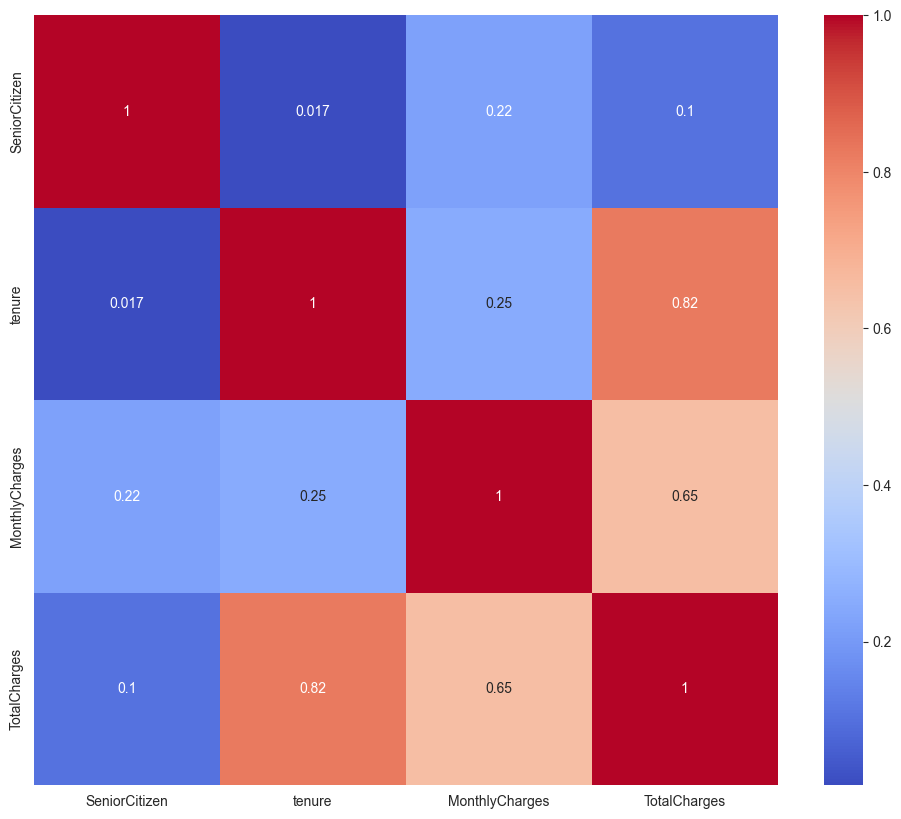

Logistic Regression accuracy: 0.8119233498935415
Decision Tree accuracy: 0.7253371185237757
Random Forest accuracy: 0.7764371894960965
SVM accuracy: 0.8055358410220014
KNN accuracy: 0.7743080198722498
Gradient Boosting accuracy: 0.8026969481902059
Epoch 1/10
177/177 [==============================] - 0s 658us/step - loss: 0.4734 - accuracy: 0.7767
Epoch 2/10
177/177 [==============================] - 0s 640us/step - loss: 0.4434 - accuracy: 0.7856
Epoch 3/10
177/177 [==============================] - 0s 627us/step - loss: 0.4409 - accuracy: 0.7945
Epoch 4/10
177/177 [==============================] - 0s 641us/step - loss: 0.4394 - accuracy: 0.7922
Epoch 5/10
177/177 [==============================] - 0s 643us/step - loss: 0.4365 - accuracy: 0.7934
Epoch 6/10
177/177 [==============================] - 0s 676us/step - loss: 0.4364 - accuracy: 0.7920
Epoch 7/10
177/177 [==============================] - 0s 659us/step - loss: 0.4334 - accuracy: 0.7934
Epoch 8/10
177/177 [==================

In [32]:
# Main function to run the project
def main():
    # Load and preprocess the data
    filepath = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Update with your dataset path
    X, y, preprocessor, df = load_and_preprocess_data(filepath)

    # Perform EDA
    perform_eda(df)

    # Apply preprocessing to the entire dataset
    X_transformed = preprocessor.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    # Train and evaluate models on the dataset
    train_and_evaluate(X_train, X_test, y_train, y_test)

    # Hyperparameter tuning on the Logistic Regression model
    best_lr_model = tune_hyperparameters(X_train, y_train)

    # Extracting and displaying feature importance for Logistic Regression model
    feature_names = preprocessor.get_feature_names_out()
    display_feature_importance(best_lr_model, feature_names)

# Run the main function
if __name__ == "__main__":
    main()

# Conclusion

As we reach the end of this Jupyter Notebook, it's important to reflect on what we have accomplished and consider next steps. Throughout this notebook, we have explored and preprocessed a dataset, performed exploratory data analysis (EDA), built and evaluated several machine learning models, tuned hyperparameters, and interpreted the results. This comprehensive approach provided us with valuable insights into the problem of customer churn in the telecommunications industry.

## Key Takeaways

- **Data Preprocessing**: We learned the importance of properly preparing data for analysis, including handling missing values and encoding categorical variables.
- **Model Selection and Evaluation**: We observed how different models perform on the same dataset and understood the significance of model evaluation metrics.
- **Hyperparameter Tuning**: The process demonstrated the impact of fine-tuning model parameters on performance.
- **Model Interpretation**: We emphasized the importance of understanding the factors that drive the model's predictions.

## Future Work

- **Further Model Exploration**: Experimenting with more advanced models or ensemble techniques.
- **Feature Engineering**: Creating new features or further transforming existing ones to improve model performance.
- **Data Augmentation**: Gathering more data or using techniques to artificially increase the dataset size for better generalization.
- **Deployment and Monitoring**: Deploying the best model in a real-world setting and continuously monitoring its performance.

By following the structured approach outlined in this notebook, we have developed a robust framework for tackling a classification problem. This methodology can be adapted and applied to various other data science and machine learning tasks.